In [30]:
%load_ext autoreload
%autoreload 2
from src.helpers import make_folders,logger,prepare_validation_strategy
from src.libs import *
from utils import *
from utils import *
from config import *
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms as T
from sklearn.preprocessing import MultiLabelBinarizer
from imgaug import augmenters as iaa
import random
import pathlib
import cv2
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
# 1. set random seed
random.seed(2050)
np.random.seed(2050)
torch.manual_seed(2050)
torch.cuda.manual_seed_all(2050)
if config.cuda_exists:
    os.environ["CUDA_VISIBLE_DEVICES"] = "0"
    torch.backends.cudnn.benchmark = True
warnings.filterwarnings('ignore')
from custom_loss import Custom_Loss
config.img_height=256
config.img_weight=256

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
cdict1 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

cdict2 = {'red':   ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

cdict3 = {'red':   ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'green': ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0))}

cdict4 = {'red': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'green': ((0.0,  0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'blue':  ((0.0,  0.0, 0.0),
                   (1.0,  0.0, 0.0))}

plt.register_cmap(name='greens', data=cdict1)
plt.register_cmap(name='reds', data=cdict2)
plt.register_cmap(name='blues', data=cdict3)
plt.register_cmap(name='yellows', data=cdict4)


In [32]:
all_files = pd.read_csv(config.path_train_csv)
all_files_ext=pd.read_csv(config.path_train_csv_ext)
print(all_files_ext.shape)
df_to_analyze=all_files_ext
train_data_path_to_analyze=config.train_data_ext

unique_labels=all_files[[len(i.split(" "))==1 for i in all_files.iloc[:,1]]]
list_of_unique_ids=list(unique_labels.index)
list_of_unique_ids[:5]
train_gen = HumanDataset(df_to_analyze,train_data_path_to_analyze,mode="train")
list_of_specific_target=list(df_to_analyze[df_to_analyze.Target=="12"].index)
config.path_train_csv_ext

(71437, 2)


'/home/minasian/PycharmProjects/prot_atlas/pac/input_ext/HPAv18/HPAv18RGBY_WithoutUncertain_wodpl.csv'

In [33]:
x,y=train_gen[list_of_specific_target[9]]

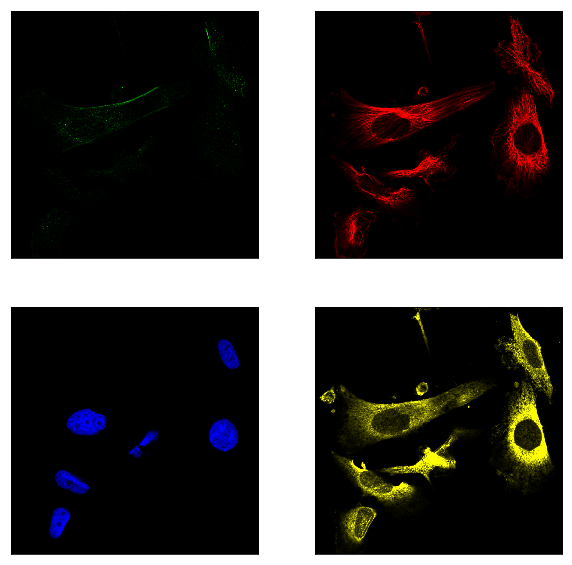

In [29]:
x,y=train_gen[list_of_specific_target[123]]
x_inp=np.asarray(x*255).astype("uint8")
r, g, b, y=x_inp
fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(10, 10))
ax[0, 0].imshow(g, cmap="greens")
# ax[0, 0].set_title("Protein of interest", fontsize=18)
ax[0, 1].imshow(r, cmap="reds")
# ax[0, 1].set_title("Microtubules", fontsize=18)
ax[1, 0].imshow(b, cmap="blues")
# ax[1, 0].set_title("Nucleus", fontsize=18)
ax[1, 1].imshow(y, cmap="yellows")
# ax[1, 1].set_title("Endoplasmic reticulum", fontsize=18)
for i in range(2):
    for j in range(2):
        ax[i, j].set_xticklabels([])
        ax[i, j].set_yticklabels([])
        ax[i, j].tick_params(left=False, bottom=False)
plt.show()

In [53]:
unique_labels.Target=unique_labels.Target.apply(lambda x:int(x))

In [54]:
np.unique(unique_labels.iloc[:,1],return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14, 16, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27]),
 array([2414,  271,  808,  654, 1077,  983,  622, 1163,   31,   17,  601,
         232,  157,  484,   27,  314,  522,   98, 1058,  213, 1653,  122,
        1470,  134,    1]))